In [30]:
# Install tidymodels if you haven't done so
# Load core tidymodels packages manually
library(parsnip)
library(recipes)
library(rsample)
library(yardstick)
library(workflows)
library(dplyr)
library(ggplot2)
library(purrr)



ERROR: Error in library(tune): there is no package called ‘tune’


In [3]:

# Load tidyverse
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ readr     2.1.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ stringr::fixed() masks recipes::fixed()
✖ dplyr::lag()     masks stats::lag()
✖ readr::spec()    masks yardstick::spec()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
url <- 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'
destfile <- "noaa-weather-sample-data.tar.gz"
download.file(url, destfile, method = "auto")

In [6]:
untar(destfile, exdir = ".")

In [7]:
weather_data <- read.csv("noaa-weather-sample-data/jfk_weather_sample.csv", stringsAsFactors = FALSE)

In [8]:
head(weather_data)

,DATE,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYStationPressure
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>
1,2015-07-25T13:51:00Z,60,46,83,68,0.00,13,30.01,29.99
2,2016-11-18T23:51:00Z,34,48,53,44,0.00,6,30.05,30.03
3,2013-01-06T08:51:00Z,33,89,36,35,0.00,13,30.14,30.12
4,2011-01-27T16:51:00Z,18,48,36,30,0.00,14,29.82,29.80
5,2015-01-03T12:16:00Z,27,61,39,34,T,11,NA,30.50
6,2013-02-15T20:51:00Z,35,79,41,38,0.00,6,29.94,29.92


Also, take a `glimpse` of the dataset to see the different column data types and make sure it is the correct subset dataset with about 5700 rows and 9 columns.


In [9]:
glimpse(weather_data)

Rows: 5,727
Columns: 9
$ DATE                   <chr> "2015-07-25T13:51:00Z", "2016-11-18T23:51:00Z",…
$ HOURLYDewPointTempF    <chr> "60", "34", "33", "18", "27", "35", "4", "14", …
$ HOURLYRelativeHumidity <int> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <int> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYWETBULBTEMPF     <int> 68, 44, 35, 30, 34, 38, 15, 21, 52, 72, 78, 35,…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "T", "0.00", "0…
$ HOURLYWindSpeed        <int> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYSeaLevelPressure <dbl> 30.01, 30.05, 30.14, 29.82, NA, 29.94, 30.42, 3…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


In [10]:
# Select the relevant columns and store in a new data frame
weather_subset <- weather_data %>%
  select(HOURLYRelativeHumidity,
         HOURLYDRYBULBTEMPF,
         HOURLYPrecip,
         HOURLYWindSpeed,
         HOURLYStationPressure)

In [11]:
# Show the first 10 rows of the weather_subset dataframe
head(weather_subset, 10)

,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
,<int>,<int>,<chr>,<int>,<dbl>
1,46,83,0.00,13,29.99
2,48,53,0.00,6,30.03
3,89,36,0.00,13,30.12
4,48,36,0.00,14,29.80
5,61,39,T,11,30.50
6,79,41,0.00,6,29.92
7,51,19,0.00,0,30.40
8,65,24,0.00,11,30.35
9,90,54,0.06,11,30.03


In [12]:
unique(weather_subset$HOURLYPrecip)

[1] "0.00"  "T"     "0.06"  NA      "0.03"  "0.02"  "0.08"  "0.01"  "0.07" 
[10] "0.16"  "0.09"  "0.22"  "0.02s" "0.24"  "0.18"  "0.05"  "0.04"  "0.09s"
[19] "0.11"  "0.14"  "0.25"  "0.10"  "0.01s" "0.58"  "0.12"  "0.13"  "0.46" 
[28] "1.07"  "1.19"  "0.34"  "0.20"  "0.36s" "0.42"  "0.17"  "0.27"  "0.35" 
[37] "0.31"  "0.33"  "0.23"  "0.26"  "0.28"  "0.75"  "0.19"  "0.36"  "0.03s"
[46] "0.07s" "0.54"  "0.59"  "0.21"

In [13]:
# Clean the HOURLYPrecip column and store in a new dataframe
weather_cleaned <- weather_subset %>%
  mutate(
    HOURLYPrecip = str_replace(HOURLYPrecip, "^T$", "0.0"),  # Replace "T" with "0.0"
    HOURLYPrecip = str_remove(HOURLYPrecip, "s$"),           # Remove trailing "s"
    HOURLYPrecip = as.numeric(HOURLYPrecip)                  # Convert to numeric
  )

# Check unique values to confirm cleaning
unique(weather_cleaned$HOURLYPrecip)

[1] 0.00 0.06   NA 0.03 0.02 0.08 0.01 0.07 0.16 0.09 0.22 0.24 0.18 0.05 0.04
[16] 0.11 0.14 0.25 0.10 0.58 0.12 0.13 0.46 1.07 1.19 0.34 0.20 0.36 0.42 0.17
[31] 0.27 0.35 0.31 0.33 0.23 0.26 0.28 0.75 0.19 0.54 0.59 0.21

In [14]:
# Check the structure and types of columns
glimpse(weather_cleaned)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <int> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <int> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYPrecip           <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,…
$ HOURLYWindSpeed        <int> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


In [15]:
# Convert HOURLYPrecip to numeric and store in a new dataframe
weather_final <- weather_cleaned %>%
  mutate(HOURLYPrecip = as.numeric(HOURLYPrecip))


In [16]:
# Confirm the change
glimpse(weather_final)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <int> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <int> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYPrecip           <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,…
$ HOURLYWindSpeed        <int> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


In [17]:
renamed_weather_data <- dplyr::rename(
  weather_final,
  relative_humidity = HOURLYRelativeHumidity,
  dry_bulb_temp_f = HOURLYDRYBULBTEMPF,
  precip = HOURLYPrecip,
  wind_speed = HOURLYWindSpeed,
  station_pressure = HOURLYStationPressure
)

In [18]:
# Set seed for reproducibility
set.seed(1234)

# Split the data: 80% training, 20% testing
data_split <- initial_split(renamed_weather_data, prop = 0.8)

# Create training and testing sets
train_data <- training(data_split)
test_data  <- testing(data_split)

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
Warning message:
“Removed 114 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 114 rows containing non-finite outside the scale range (`stat_bin()`).”


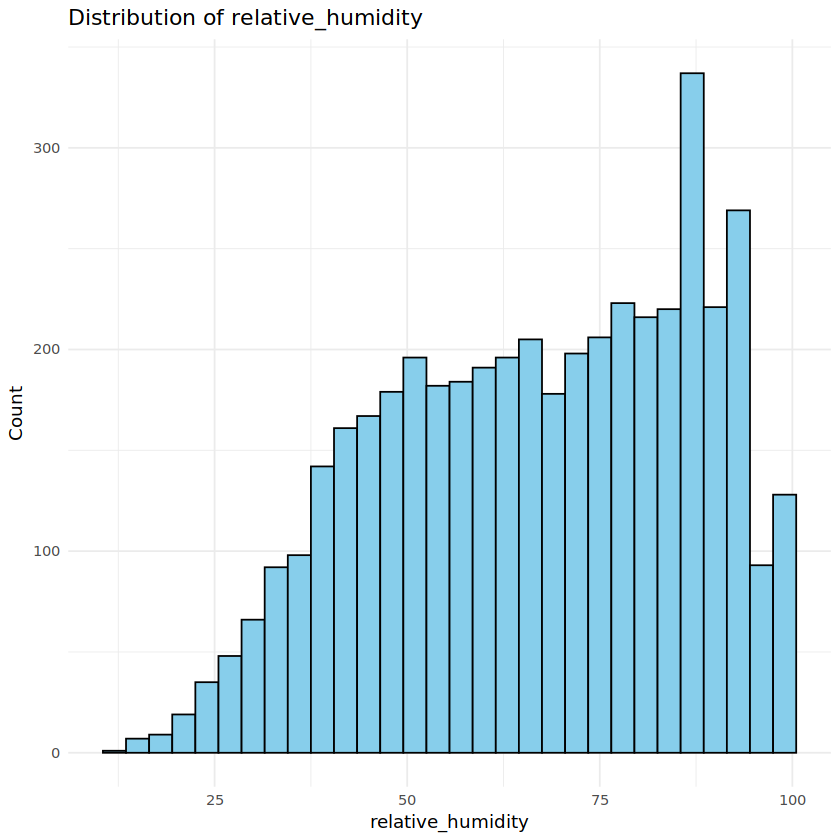

Warning message:
“Removed 1349 rows containing non-finite outside the scale range (`stat_bin()`).”


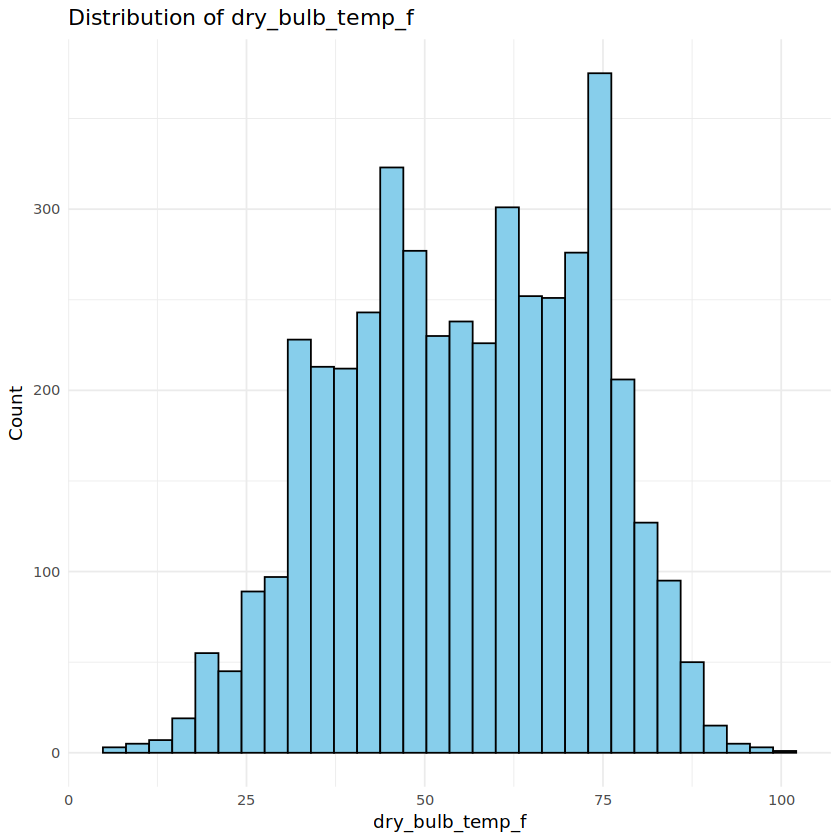

Warning message:
“Removed 119 rows containing non-finite outside the scale range (`stat_bin()`).”


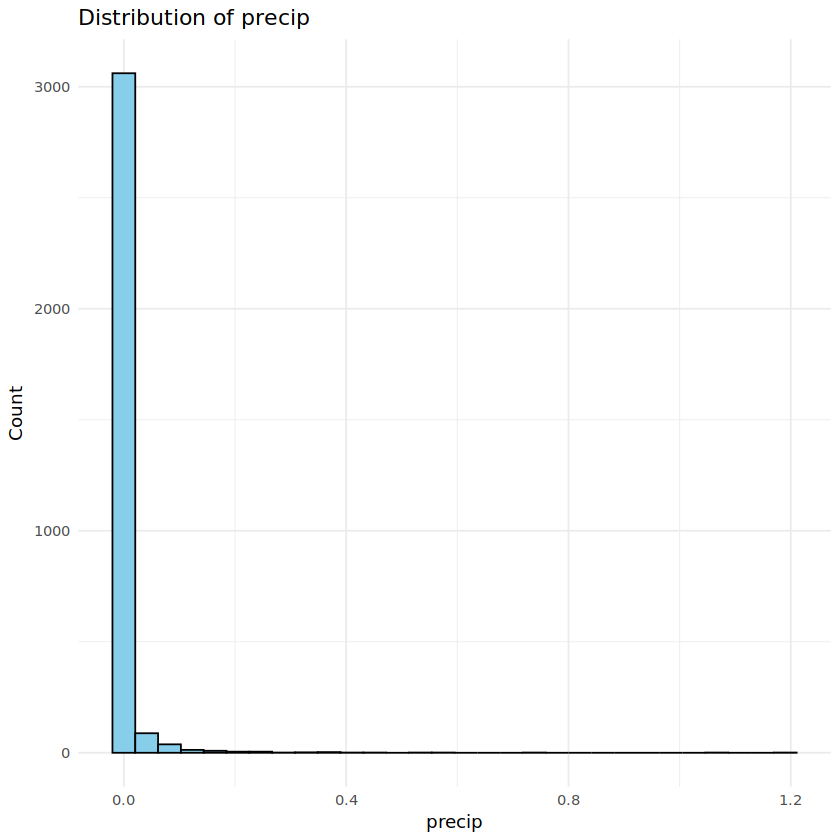

Warning message:
“Removed 121 rows containing non-finite outside the scale range (`stat_bin()`).”


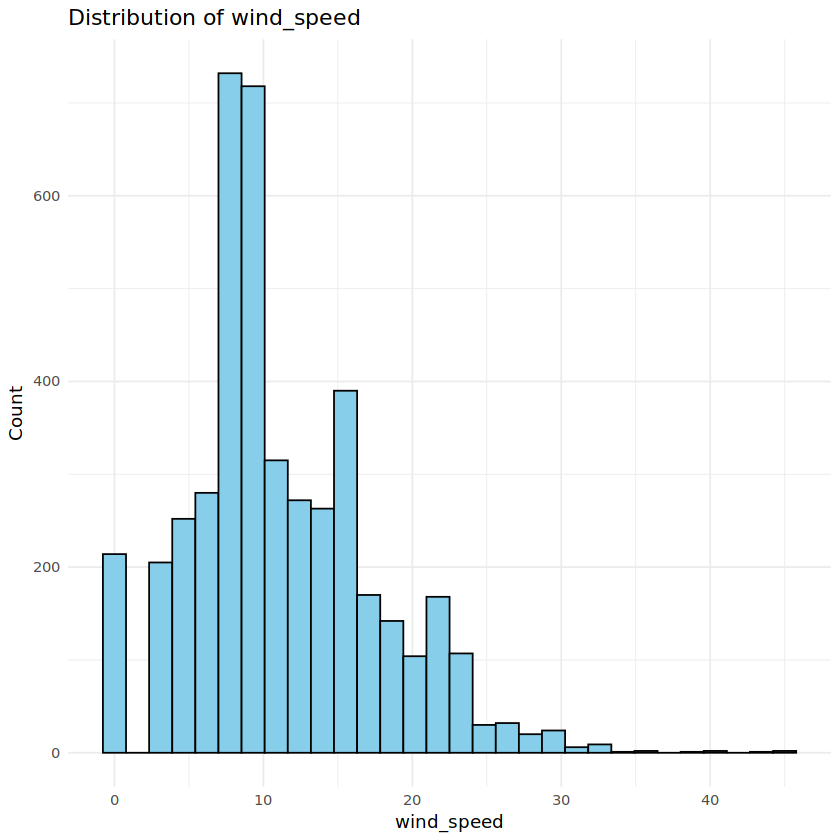

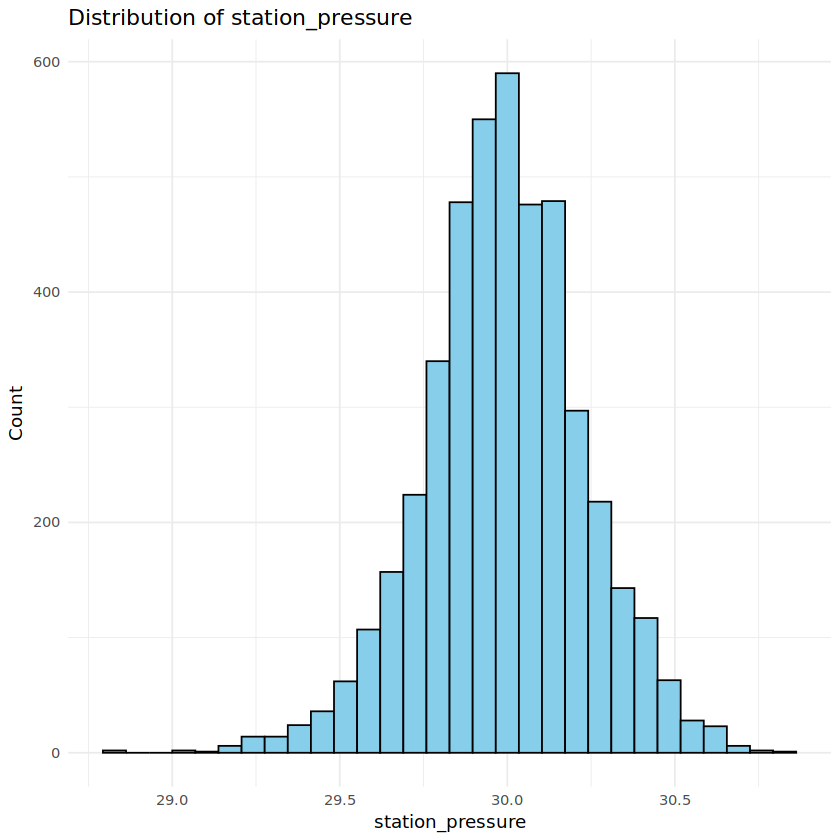

In [19]:
# Create a list of variables to plot
vars_to_plot <- c("relative_humidity", "dry_bulb_temp_f", "precip", "wind_speed", "station_pressure")

# Loop through variables and create histograms
for (var in vars_to_plot) {
  p <- ggplot(train_data, aes_string(x = var)) +
    geom_histogram(bins = 30, fill = "skyblue", color = "black") +
    labs(title = paste("Distribution of", var), x = var, y = "Count") +
    theme_minimal()
  
  print(p)
}

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1349 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1349 rows containing missing values or values outside the scale range
(`geom_point()`).”


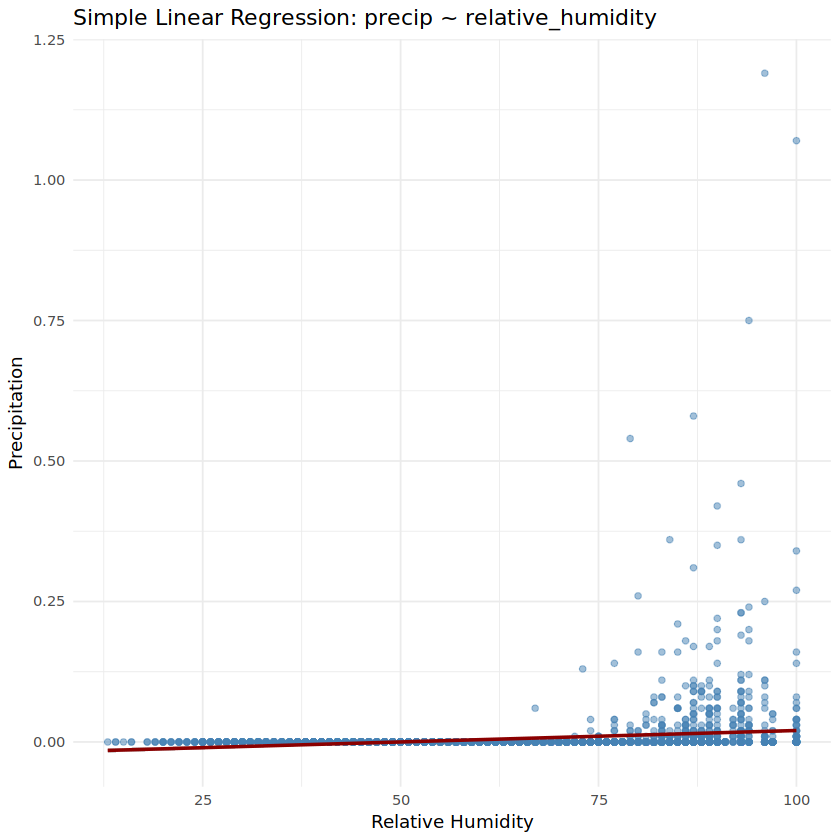

In [20]:
# Model 1: precip ~ relative_humidity
model_rh <- lm(precip ~ relative_humidity, data = train_data)

# Plot Model 1
ggplot(train_data, aes(x = relative_humidity, y = precip)) +
  geom_point(alpha = 0.5, color = "steelblue") +
  geom_smooth(method = "lm", se = TRUE, color = "darkred") +
  labs(
    title = "Simple Linear Regression: precip ~ relative_humidity",
    x = "Relative Humidity",
    y = "Precipitation"
  ) +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1349 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1349 rows containing missing values or values outside the scale range
(`geom_point()`).”


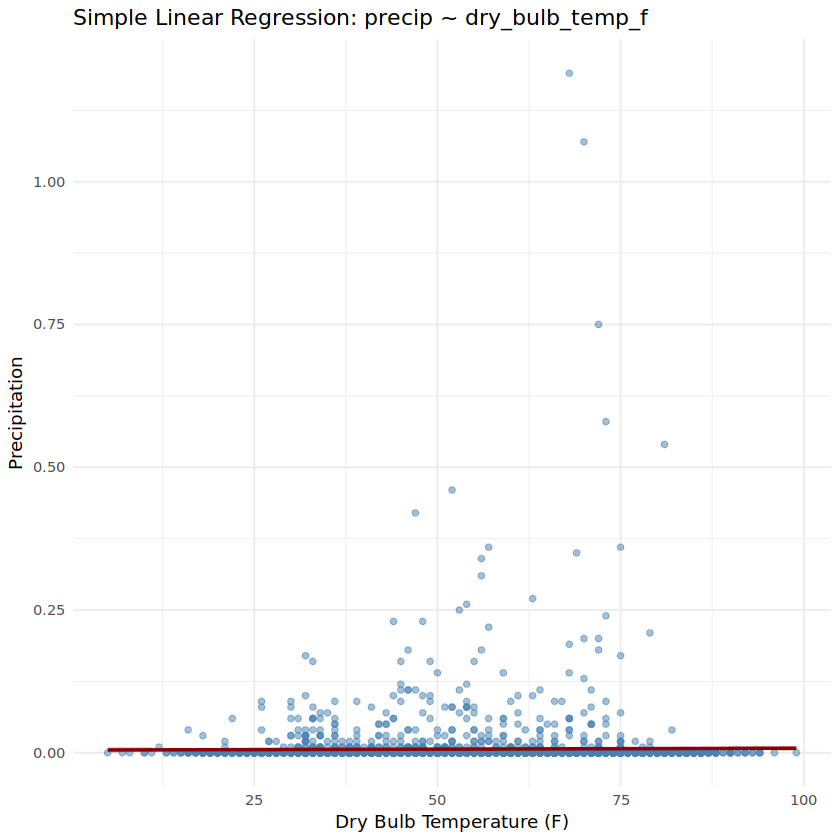

In [21]:
# Model 2: precip ~ dry_bulb_temp_f
model_temp <- lm(precip ~ dry_bulb_temp_f, data = train_data)

# Plot Model 2
ggplot(train_data, aes(x = dry_bulb_temp_f, y = precip)) +
  geom_point(alpha = 0.5, color = "steelblue") +
  geom_smooth(method = "lm", se = TRUE, color = "darkred") +
  labs(
    title = "Simple Linear Regression: precip ~ dry_bulb_temp_f",
    x = "Dry Bulb Temperature (F)",
    y = "Precipitation"
  ) +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1349 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1349 rows containing missing values or values outside the scale range
(`geom_point()`).”


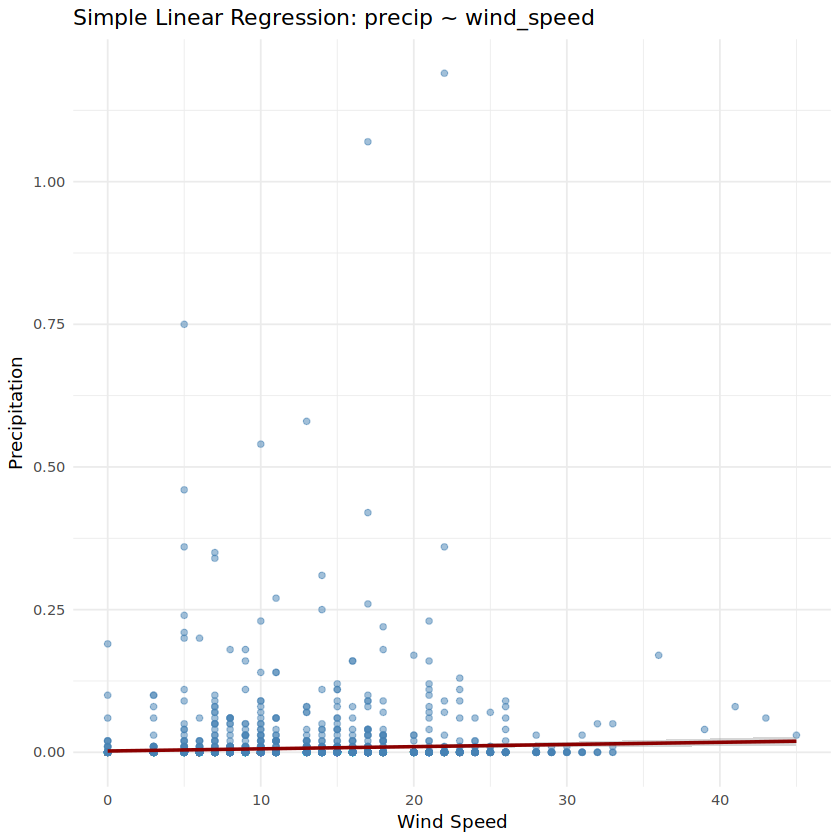

In [22]:
# Model 3: precip ~ wind_speed
model_wind <- lm(precip ~ wind_speed, data = train_data)

# Plot Model 3
ggplot(train_data, aes(x = wind_speed, y = precip)) +
  geom_point(alpha = 0.5, color = "steelblue") +
  geom_smooth(method = "lm", se = TRUE, color = "darkred") +
  labs(
    title = "Simple Linear Regression: precip ~ wind_speed",
    x = "Wind Speed",
    y = "Precipitation"
  ) +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1353 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1353 rows containing missing values or values outside the scale range
(`geom_point()`).”


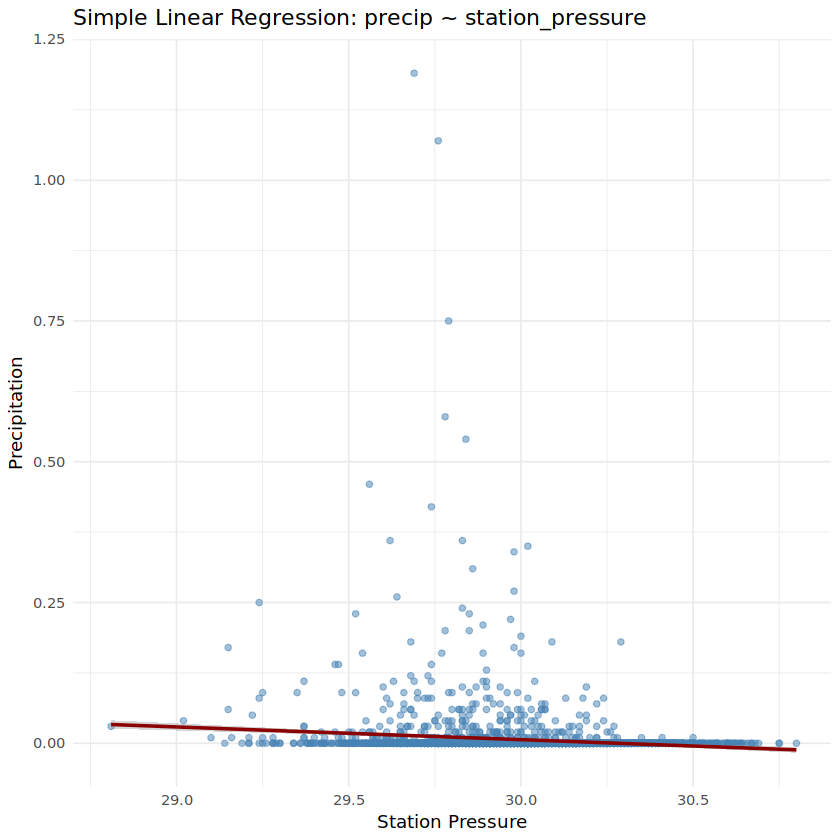

In [23]:
# Model 4: precip ~ station_pressure
model_press <- lm(precip ~ station_pressure, data = train_data)

# Plot Model 4
ggplot(train_data, aes(x = station_pressure, y = precip)) +
  geom_point(alpha = 0.5, color = "steelblue") +
  geom_smooth(method = "lm", se = TRUE, color = "darkred") +
  labs(
    title = "Simple Linear Regression: precip ~ station_pressure",
    x = "Station Pressure",
    y = "Precipitation"
  ) +
  theme_minimal()

In [32]:
# Create multivariable recipe
multi_recipe <- recipe(precip ~ relative_humidity + dry_bulb_temp_f + wind_speed + station_pressure, data = train_data)

# Set model specification: simple linear regression
lm_spec <- linear_reg() %>% 
  set_engine("lm")

# Create workflow
multi_wf <- workflow() %>%
  add_recipe(multi_recipe) %>%
  add_model(lm_spec)

# Fit the multivariable model
multi_fit <- fit(multi_wf, data = train_data)

# Evaluate performance on training data
multi_pred <- predict(multi_fit, train_data) %>%
  bind_cols(train_data)

multi_metrics <- metrics(multi_pred, truth = precip, estimate = .pred)
multi_metrics


# Create polynomial recipe (add wind_speed squared)
poly_recipe <- recipe(precip ~ relative_humidity + dry_bulb_temp_f + wind_speed + station_pressure, data = train_data) %>%
  step_mutate(wind_speed_sq = wind_speed^2)

# Reuse linear model specification (lm_spec)

# Create workflow
poly_wf <- workflow() %>%
  add_recipe(poly_recipe) %>%
  add_model(lm_spec)

# Fit the polynomial model
poly_fit <- fit(poly_wf, data = train_data)

# Evaluate performance on training data
poly_pred <- predict(poly_fit, train_data) %>%
  bind_cols(train_data)

poly_metrics <- metrics(poly_pred, truth = precip, estimate = .pred)
poly_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.04237299
rsq,standard,0.04749902
mae,standard,0.01258635


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.04237214
rsq,standard,0.04753755
mae,standard,0.01259711
